### Student: Morgan, Josh (V00919952)
# Dota Draft Outcome Predictor


In [1]:
# Setting Random Seed for Problem
import numpy as np
import random
np.random.seed(1337)
random.seed(1337)

## Helper Fuctions for Plotting

In [2]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

## Source https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html
def plot_learning_curve(
    estimator,
    title,
    X,
    y,
    axes=None,
    ylim=None,
    cv=None,
    n_jobs=None,
    scoring=None,
    train_sizes=np.linspace(0.1, 1.0, 5),
):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : estimator instance
        An estimator instance implementing `fit` and `predict` methods which
        will be cloned for each validation.

    title : str
        Title for the chart.

    X : array-like of shape (n_samples, n_features)
        Training vector, where ``n_samples`` is the number of samples and
        ``n_features`` is the number of features.

    y : array-like of shape (n_samples) or (n_samples, n_features)
        Target relative to ``X`` for classification or regression;
        None for unsupervised learning.

    axes : array-like of shape (3,), default=None
        Axes to use for plotting the curves.

    ylim : tuple of shape (2,), default=None
        Defines minimum and maximum y-values plotted, e.g. (ymin, ymax).

    cv : int, cross-validation generator or an iterable, default=None
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, default=None
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    scoring : str or callable, default=None
        A str (see model evaluation documentation) or
        a scorer callable object / function with signature
        ``scorer(estimator, X, y)``.

    train_sizes : array-like of shape (n_ticks,)
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the ``dtype`` is float, it is regarded
        as a fraction of the maximum size of the training set (that is
        determined by the selected validation method), i.e. it has to be within
        (0, 1]. Otherwise it is interpreted as absolute sizes of the training
        sets. Note that for classification the number of samples usually have
        to be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        estimator,
        X,
        y,
        scoring=scoring,
        cv=cv,
        n_jobs=n_jobs,
        train_sizes=train_sizes,
        return_times=True,
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    axes[0].fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    axes[0].plot(
        train_sizes, train_scores_mean, "o-", color="r", label="Training score"
    )
    axes[0].plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
    )
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, "o-")
    axes[1].fill_between(
        train_sizes,
        fit_times_mean - fit_times_std,
        fit_times_mean + fit_times_std,
        alpha=0.1,
    )
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    fit_time_argsort = fit_times_mean.argsort()
    fit_time_sorted = fit_times_mean[fit_time_argsort]
    test_scores_mean_sorted = test_scores_mean[fit_time_argsort]
    test_scores_std_sorted = test_scores_std[fit_time_argsort]
    axes[2].grid()
    axes[2].plot(fit_time_sorted, test_scores_mean_sorted, "o-")
    axes[2].fill_between(
        fit_time_sorted,
        test_scores_mean_sorted - test_scores_std_sorted,
        test_scores_mean_sorted + test_scores_std_sorted,
        alpha=0.1,
    )
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt

## Getting the Training Splits

In [3]:
# Imports
from sklearn.model_selection import train_test_split
import pandas as pd

In [4]:
data = pd.read_csv('data.csv', header=0)
#data = pd.read_csv('old_data.csv', header=0)
y = data['did_radiant_win']
try:
    X = data.drop(columns=['_id'])
except:
    print('using old data')
X = data.drop(columns=['did_radiant_win', 'match_id'])
X = pd.get_dummies(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10)
print(len(X_train))
print(len(X_test))

21140
2349


## Decision Trees and Random Forrest

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [6]:
# Getting Training and Testing splits for decision tree model
X_decision_tree_train, X_decision_tree_test, y_decision_tree_train, y_decision_tree_test = train_test_split(X_train, y_train, test_size=0.30)

In [7]:
# Decision Tree - 3 mins
tree_para = {'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}
grid_tree_model = GridSearchCV(DecisionTreeClassifier(), tree_para, cv=5)
grid_tree_model.fit(X_decision_tree_train, y_decision_tree_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 20, 30,
                                       40, 50, 70, 90, 120, 150]})

In [8]:
best_tree_model = grid_tree_model.best_estimator_
training_accuracy = best_tree_model.score(X_decision_tree_train, y_decision_tree_train)
validation_accuracy = best_tree_model.score(X_decision_tree_test, y_decision_tree_test)

print(f"Training Accuracy = {training_accuracy}")
print(f"validation Accuracy = {validation_accuracy}")
print(f"best parameters = {grid_tree_model.best_params_}")

Training Accuracy = 0.6571158264630356
validation Accuracy = 0.5477767265846736
best parameters = {'criterion': 'entropy', 'max_depth': 30}


<module 'matplotlib.pyplot' from 'c:\\Users\\eston\\Desktop\\SENG 474\\SENG474-Project\\.venv\\lib\\site-packages\\matplotlib\\pyplot.py'>

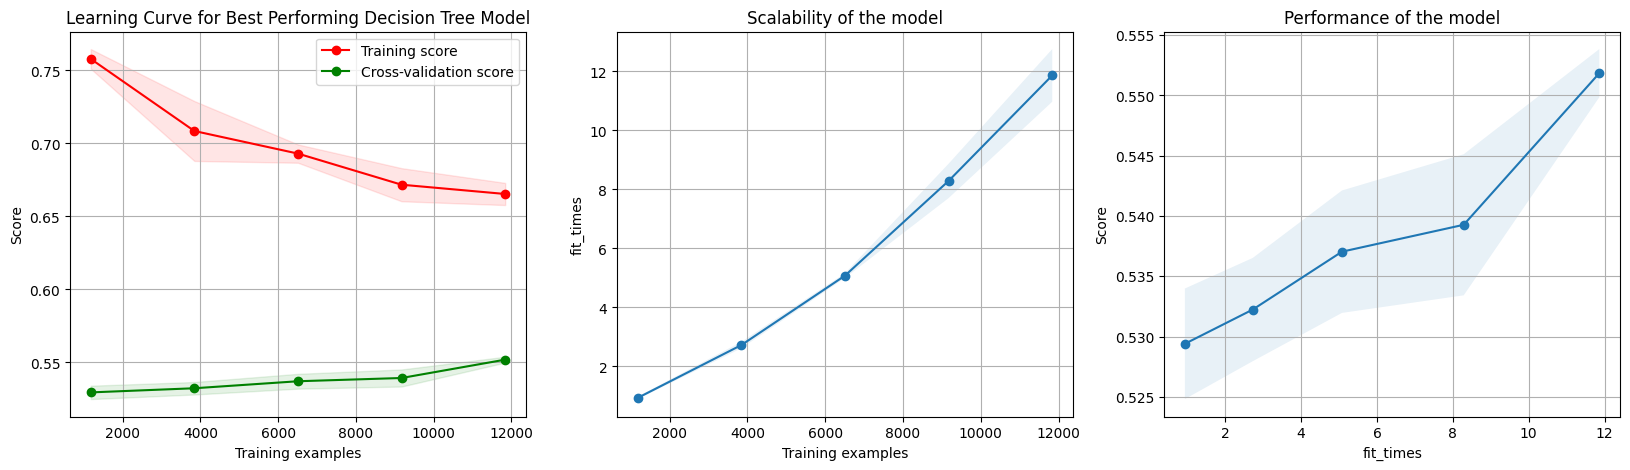

In [9]:
plot_learning_curve(best_tree_model, "Learning Curve for Best Performing Decision Tree Model", X_decision_tree_train, y_decision_tree_train, n_jobs=5)

In [10]:
# Random Forrest - 16 mins
forest_para = {'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,], 'n_estimators': [5, 10, 50, 100, 200, 500]}
grid_forest_model = GridSearchCV(RandomForestClassifier(), forest_para, cv=5)
grid_forest_model.fit(X_decision_tree_train, y_decision_tree_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 20],
                         'n_estimators': [5, 10, 50, 100, 200, 500]})

In [11]:
best_forest_model = grid_forest_model.best_estimator_
training_accuracy = best_forest_model.score(X_decision_tree_train, y_decision_tree_train)
validation_accuracy = best_forest_model.score(X_decision_tree_test, y_decision_tree_test)

print(f"Training Accuracy = {training_accuracy}")
print(f"validation Accuracy = {validation_accuracy}")
print(f"best parameters = {grid_forest_model.best_params_}")

Training Accuracy = 0.6175834572239491
validation Accuracy = 0.5309050772626932
best parameters = {'criterion': 'gini', 'max_depth': 20, 'n_estimators': 100}


<module 'matplotlib.pyplot' from 'c:\\Users\\eston\\Desktop\\SENG 474\\SENG474-Project\\.venv\\lib\\site-packages\\matplotlib\\pyplot.py'>

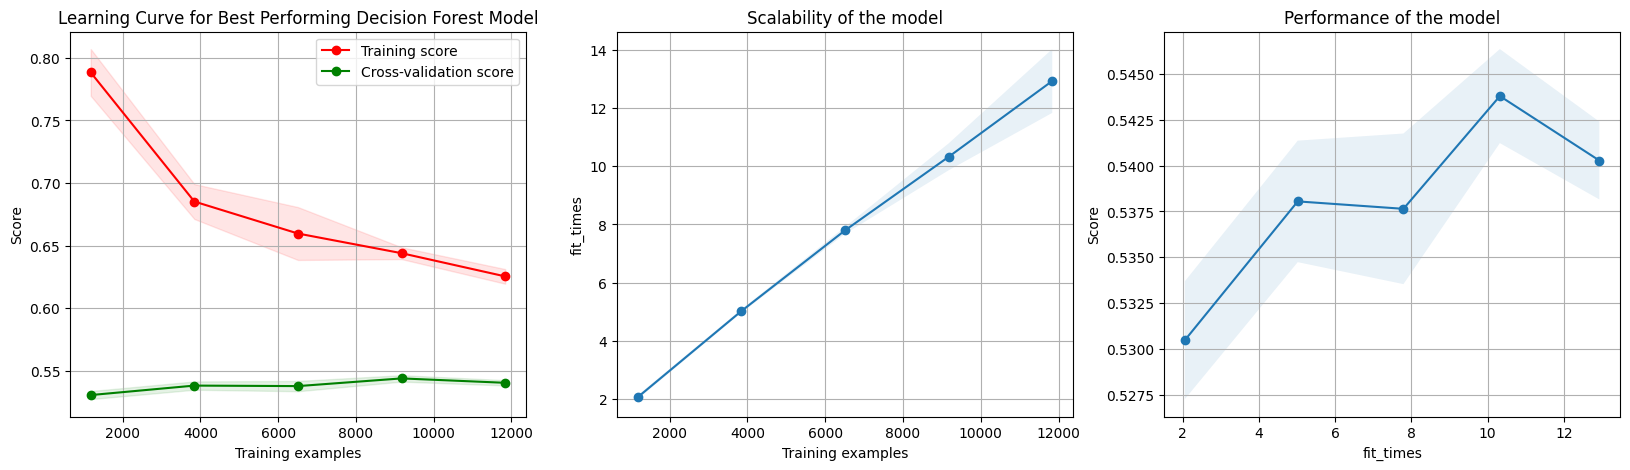

In [12]:
plot_learning_curve(best_forest_model, "Learning Curve for Best Performing Decision Forest Model", X_decision_tree_train, y_decision_tree_train, n_jobs=5)

## Logistic Regression

In [13]:
from sklearn.linear_model import LogisticRegression

In [14]:
X_logistic_regression_train, X_logistic_regression_test, y_logistic_regression_train, y_logistic_regression_test = train_test_split(X_train, y_train, test_size=0.30)

In [15]:
# Logistic Regression - 5 mins
logistic_para = {'penalty':['l2'],'C':[0.5, 0.75, 1.0], 'solver':['newton-cg', 'saga'], 'class_weight':['balanced', None]}
grid_logistic_model = GridSearchCV(LogisticRegression(), logistic_para, cv=5)
grid_logistic_model.fit(X_logistic_regression_train, y_logistic_regression_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.5, 0.75, 1.0],
                         'class_weight': ['balanced', None], 'penalty': ['l2'],
                         'solver': ['newton-cg', 'saga']})

In [16]:
best_logistic_model = grid_logistic_model.best_estimator_
training_accuracy = best_logistic_model.score(X_logistic_regression_train, y_logistic_regression_train)
validation_accuracy = best_logistic_model.score(X_logistic_regression_test, y_logistic_regression_test)

print(f"Training Accuracy = {training_accuracy}")
print(f"validation Accuracy = {validation_accuracy}")
print(f"best parameters = {grid_logistic_model.best_params_}")

Training Accuracy = 0.7771320448709285
validation Accuracy = 0.5753705455692211
best parameters = {'C': 0.5, 'class_weight': None, 'penalty': 'l2', 'solver': 'newton-cg'}


<module 'matplotlib.pyplot' from 'c:\\Users\\eston\\Desktop\\SENG 474\\SENG474-Project\\.venv\\lib\\site-packages\\matplotlib\\pyplot.py'>

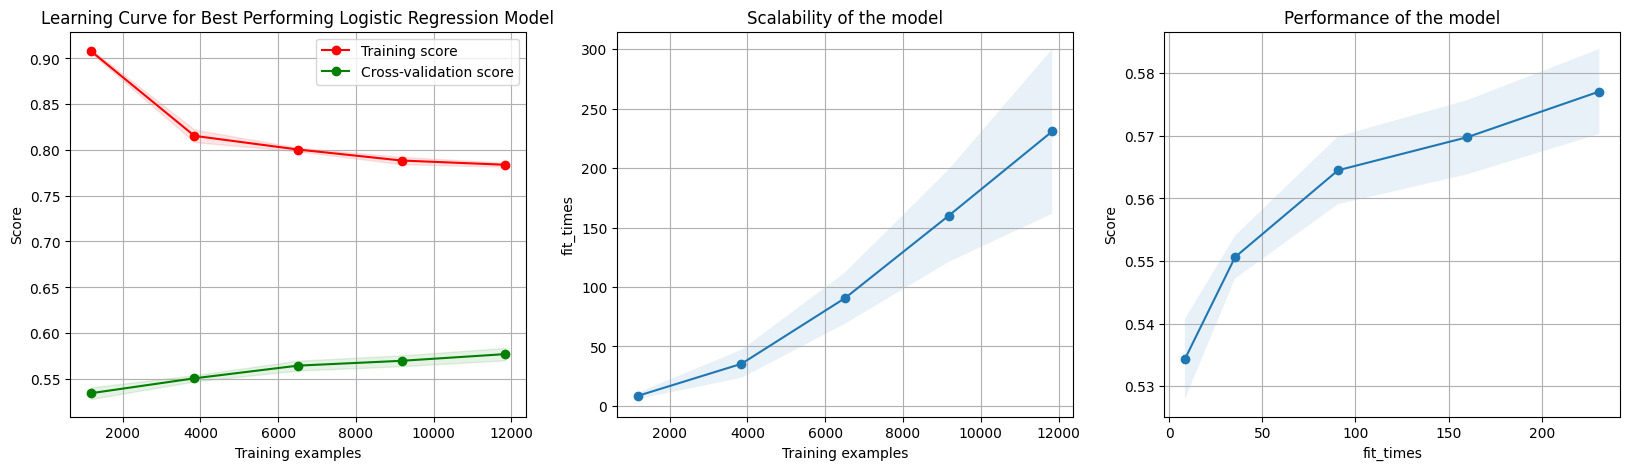

In [17]:
plot_learning_curve(best_logistic_model, "Learning Curve for Best Performing Logistic Regression Model", X_logistic_regression_train, y_logistic_regression_train, n_jobs=5)

## Naive Bayes

In [18]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB

In [19]:
X_NB_train, X_NB_test, y_NB_train, y_NB_test = train_test_split(X_train, y_train, test_size=0.30)

In [20]:
# Multinomial Naive Bayes - 2 mins
MNB_model = MultinomialNB()
MNB_model.fit(X_NB_train, y_NB_train)

MultinomialNB()

In [21]:
training_accuracy = MNB_model.score(X_NB_train, y_NB_train)
validation_accuracy = MNB_model.score(X_NB_test, y_NB_test)

print(f"Training Accuracy = {training_accuracy}")
print(f"validation Accuracy = {validation_accuracy}")

Training Accuracy = 0.9101229895931883
validation Accuracy = 0.5793125197098707


<module 'matplotlib.pyplot' from 'c:\\Users\\eston\\Desktop\\SENG 474\\SENG474-Project\\.venv\\lib\\site-packages\\matplotlib\\pyplot.py'>

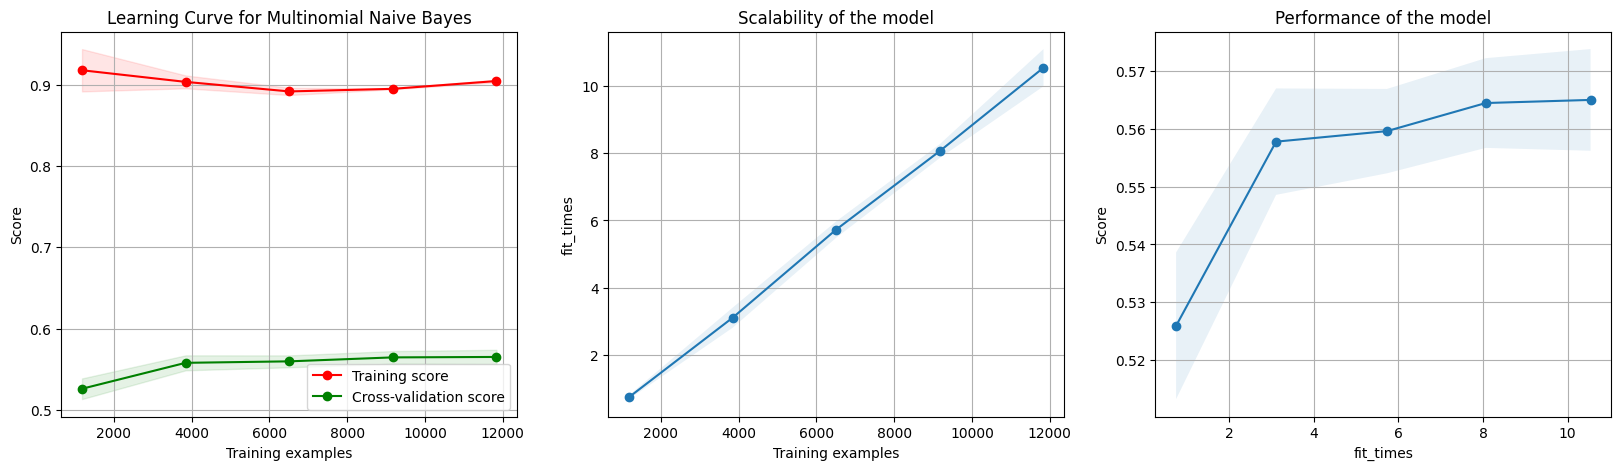

In [22]:
plot_learning_curve(MNB_model, "Learning Curve for Multinomial Naive Bayes", X_NB_train, y_NB_train, n_jobs=5)

In [23]:
# BernoulliNB Naive Bayes - 0.2 secs
BNB_model = BernoulliNB()
BNB_model.fit(X_NB_train, y_NB_train)

BernoulliNB()

In [24]:
training_accuracy = BNB_model.score(X_NB_train, y_NB_train)
validation_accuracy = BNB_model.score(X_NB_test, y_NB_test)

print(f"Training Accuracy = {training_accuracy}")
print(f"validation Accuracy = {validation_accuracy}")

Training Accuracy = 0.9005270982565211
validation Accuracy = 0.5771050141911069


<module 'matplotlib.pyplot' from 'c:\\Users\\eston\\Desktop\\SENG 474\\SENG474-Project\\.venv\\lib\\site-packages\\matplotlib\\pyplot.py'>

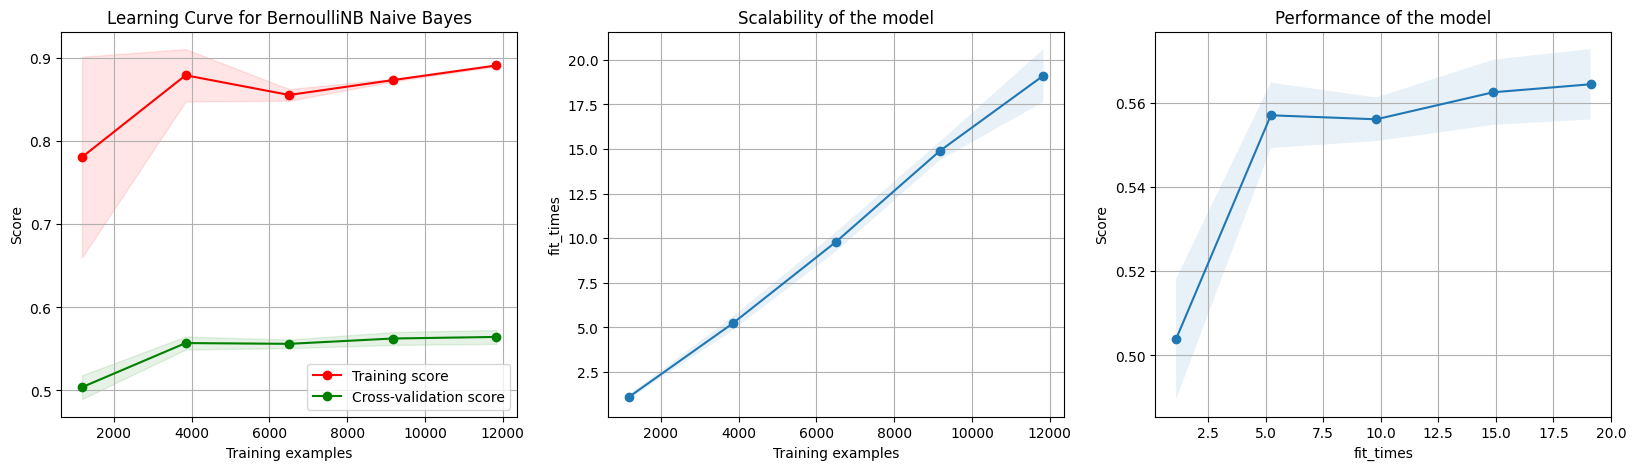

In [25]:
plot_learning_curve(BNB_model, "Learning Curve for BernoulliNB Naive Bayes", X_NB_train, y_NB_train, n_jobs=5)

In [26]:
# GaussianNB Naive Bayes -  0.2 secs
GNB_model = GaussianNB()
GNB_model.fit(X_NB_train, y_NB_train)

GaussianNB()

In [27]:
training_accuracy = GNB_model.score(X_NB_train, y_NB_train)
validation_accuracy = GNB_model.score(X_NB_test, y_NB_test)

print(f"Training Accuracy = {training_accuracy}")
print(f"validation Accuracy = {validation_accuracy}")

Training Accuracy = 1.0
validation Accuracy = 0.4735099337748344


<module 'matplotlib.pyplot' from 'c:\\Users\\eston\\Desktop\\SENG 474\\SENG474-Project\\.venv\\lib\\site-packages\\matplotlib\\pyplot.py'>

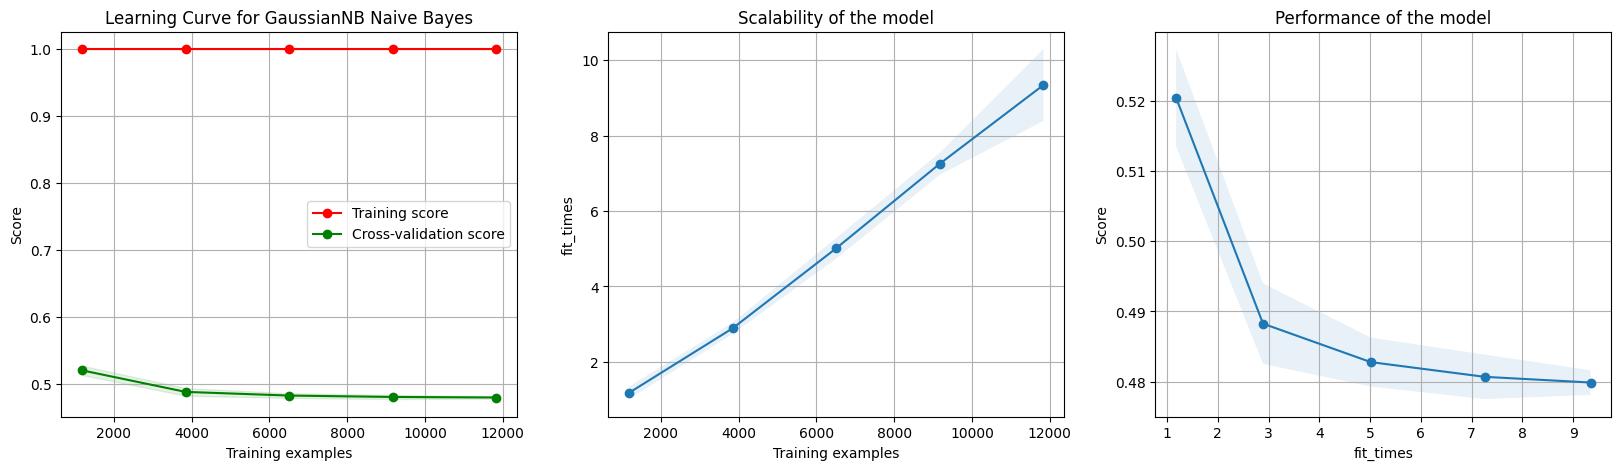

In [28]:
plot_learning_curve(GNB_model, "Learning Curve for GaussianNB Naive Bayes", X_NB_train, y_NB_train, n_jobs=5)

## Neural Networks

In [29]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Input
from keras.models import Model
from keras.layers import Concatenate
from keras.optimizers import Adam
from keras.callbacks import LambdaCallback
from keras.metrics import BinaryAccuracy
from keras.losses import BinaryCrossentropy
from keras.layers import Dropout

In [30]:
X_Net_train, X_Net_test, y_Net_train, y_Net_test = train_test_split(X_train, y_train, test_size=0.30)

In [31]:
# Simple One Layer Net
optimizer = Adam(learning_rate=0.0002)

one_layer_model = Sequential()
one_layer_model.add(Dense(100, activation='sigmoid'))
one_layer_model.add(Dense(1, activation='sigmoid'))
one_layer_model.compile(loss=BinaryCrossentropy(),optimizer=optimizer, metrics=[BinaryAccuracy()])

In [32]:
history = one_layer_model.fit(X_Net_train, y_Net_train, epochs=20, validation_data=(X_Net_test, y_Net_test))

Epoch 1/20
463/463 [==============================] - 5s 10ms/step - loss: 0.6961 - binary_accuracy: 0.5357 - val_loss: 0.6854 - val_binary_accuracy: 0.5672
Epoch 2/20
463/463 [==============================] - 4s 9ms/step - loss: 0.6747 - binary_accuracy: 0.5995 - val_loss: 0.6798 - val_binary_accuracy: 0.5768
Epoch 3/20
463/463 [==============================] - 4s 9ms/step - loss: 0.6608 - binary_accuracy: 0.6434 - val_loss: 0.6756 - val_binary_accuracy: 0.5788
Epoch 4/20
463/463 [==============================] - 4s 9ms/step - loss: 0.6476 - binary_accuracy: 0.6668 - val_loss: 0.6726 - val_binary_accuracy: 0.5815
Epoch 5/20
463/463 [==============================] - 4s 9ms/step - loss: 0.6347 - binary_accuracy: 0.6823 - val_loss: 0.6707 - val_binary_accuracy: 0.5774
Epoch 6/20
463/463 [==============================] - 4s 9ms/step - loss: 0.6218 - binary_accuracy: 0.6979 - val_loss: 0.6696 - val_binary_accuracy: 0.5837
Epoch 7/20
463/463 [==============================] - 4s 9ms/st

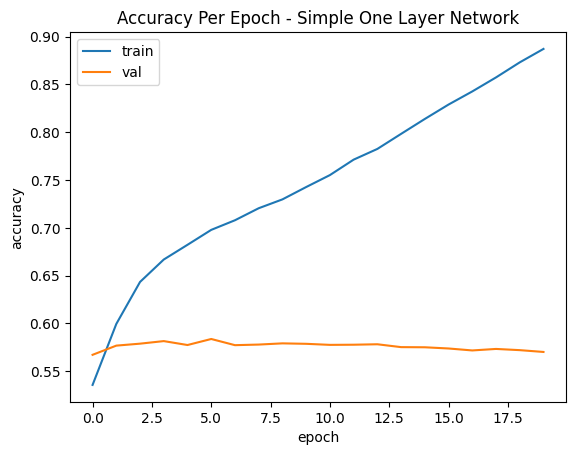

In [33]:
plt.plot(history.history['binary_accuracy'])
plt.plot(history.history['val_binary_accuracy'])
plt.title('Accuracy Per Epoch - Simple One Layer Network')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [34]:
# multi-layer sigmoid One Layer Net
optimizer = Adam(learning_rate=0.0002)

multi_layer_model = Sequential()
multi_layer_model.add(Dense(200, activation='sigmoid'))
multi_layer_model.add(Dropout(0.2))
multi_layer_model.add(Dense(200, activation='sigmoid'))
multi_layer_model.add(Dropout(0.2))
multi_layer_model.add(Dense(1, activation='sigmoid'))
multi_layer_model.compile(loss=BinaryCrossentropy(),optimizer=optimizer, metrics=[BinaryAccuracy()])

In [35]:
history = multi_layer_model.fit(X_Net_train, y_Net_train, epochs=20, validation_data=(X_Net_test, y_Net_test))

Epoch 1/20
463/463 [==============================] - 8s 16ms/step - loss: 0.7056 - binary_accuracy: 0.5066 - val_loss: 0.6912 - val_binary_accuracy: 0.5214
Epoch 2/20
463/463 [==============================] - 7s 15ms/step - loss: 0.7005 - binary_accuracy: 0.5116 - val_loss: 0.6893 - val_binary_accuracy: 0.5214
Epoch 3/20
463/463 [==============================] - 7s 15ms/step - loss: 0.6897 - binary_accuracy: 0.5369 - val_loss: 0.6864 - val_binary_accuracy: 0.5826
Epoch 4/20
463/463 [==============================] - 7s 15ms/step - loss: 0.6827 - binary_accuracy: 0.5580 - val_loss: 0.6811 - val_binary_accuracy: 0.5806
Epoch 5/20
463/463 [==============================] - 7s 15ms/step - loss: 0.6704 - binary_accuracy: 0.5776 - val_loss: 0.6742 - val_binary_accuracy: 0.5790
Epoch 6/20
463/463 [==============================] - 7s 15ms/step - loss: 0.6536 - binary_accuracy: 0.6207 - val_loss: 0.6761 - val_binary_accuracy: 0.5714
Epoch 7/20
463/463 [==============================] - 7s 1

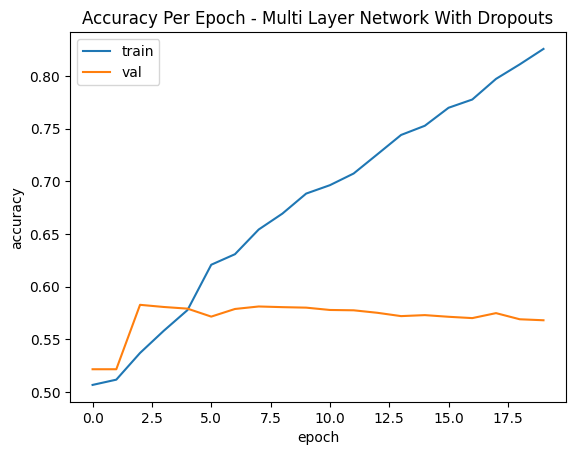

In [36]:
plt.plot(history.history['binary_accuracy'])
plt.plot(history.history['val_binary_accuracy'])
plt.title('Accuracy Per Epoch - Multi Layer Network With Dropouts')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [37]:
# multi-layer selu Net
optimizer = Adam(learning_rate=0.00002)

multi_layer_relu_model = Sequential()
multi_layer_relu_model.add(Dense(200, activation='selu'))
multi_layer_relu_model.add(Dropout(0.2))
multi_layer_relu_model.add(Dense(200, activation='selu'))
multi_layer_relu_model.add(Dropout(0.2))
multi_layer_relu_model.add(Dense(1, activation='sigmoid'))
multi_layer_relu_model.compile(loss=BinaryCrossentropy(),optimizer=optimizer, metrics=[BinaryAccuracy()])

In [38]:
history = multi_layer_relu_model.fit(X_Net_train, y_Net_train, epochs=20, validation_data=(X_Net_test, y_Net_test))

Epoch 1/20
463/463 [==============================] - 8s 16ms/step - loss: 0.6917 - binary_accuracy: 0.5180 - val_loss: 0.6880 - val_binary_accuracy: 0.5438
Epoch 2/20
463/463 [==============================] - 7s 15ms/step - loss: 0.6783 - binary_accuracy: 0.5879 - val_loss: 0.6815 - val_binary_accuracy: 0.5661
Epoch 3/20
463/463 [==============================] - 7s 15ms/step - loss: 0.6614 - binary_accuracy: 0.6314 - val_loss: 0.6751 - val_binary_accuracy: 0.5738
Epoch 4/20
463/463 [==============================] - 7s 15ms/step - loss: 0.6395 - binary_accuracy: 0.6595 - val_loss: 0.6707 - val_binary_accuracy: 0.5788
Epoch 5/20
463/463 [==============================] - 7s 15ms/step - loss: 0.6152 - binary_accuracy: 0.6794 - val_loss: 0.6699 - val_binary_accuracy: 0.5815
Epoch 6/20
463/463 [==============================] - 7s 15ms/step - loss: 0.5877 - binary_accuracy: 0.7097 - val_loss: 0.6729 - val_binary_accuracy: 0.5810
Epoch 7/20
463/463 [==============================] - 7s 1

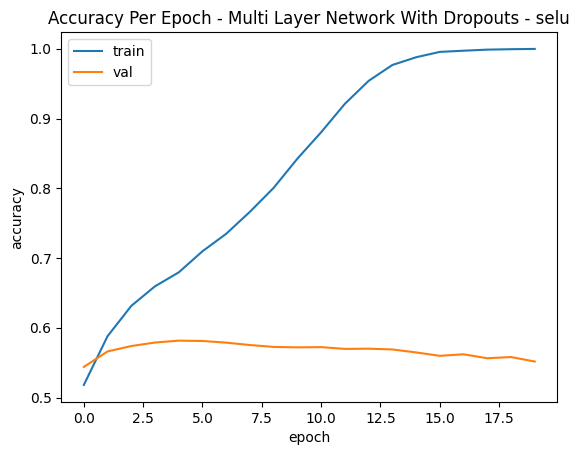

In [39]:
plt.plot(history.history['binary_accuracy'])
plt.plot(history.history['val_binary_accuracy'])
plt.title('Accuracy Per Epoch - Multi Layer Network With Dropouts - selu')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [40]:
class EnsembleWrapper():
    def __init__(self, dire, rad, combined):
        self.dire_model = dire
        self.radiant_model = rad
        self.combined = combined
    def predict(self, X):
        output = []
        dire = self.dire_model.predict(X.iloc[:,605:])
        radiant = self.radiant_model.predict(X.iloc[:,:605])
        combined = self.combined.predict(X)
        for i in range(len(X)):
            if(dire[i] + radiant[i] + combined[i] >= 1.5):
                output.append(1)
            else:
                output.append(0)
                
        return output

    def score(self, X, y):
        predictions = self.predict(X)

        total = len(predictions)
        right = 0
        for i, prediction in enumerate(predictions):
            if(prediction == y.iloc[i]):
                right += 1
        return right/total


In [41]:
# single-layer enemble model 
optimizer = Adam(learning_rate=0.0002)

dire_model = Sequential()
dire_model.add(Dense(100, activation='sigmoid'))
dire_model.add(Dense(1, activation='sigmoid'))
dire_model.compile(loss=BinaryCrossentropy(),optimizer=optimizer, metrics=[BinaryAccuracy()])

radiant_model = Sequential()
radiant_model.add(Dense(100, activation='sigmoid'))
radiant_model.add(Dense(1, activation='sigmoid'))
radiant_model.compile(loss=BinaryCrossentropy(),optimizer=optimizer, metrics=[BinaryAccuracy()])

combined_model = Sequential()
combined_model.add(Dense(100, activation='sigmoid'))
combined_model.add(Dense(1, activation='sigmoid'))
combined_model.compile(loss=BinaryCrossentropy(),optimizer=optimizer, metrics=[BinaryAccuracy()])

In [42]:
dire_model.fit(X_Net_train.iloc[:,605:], y_Net_train, epochs=5, validation_data=(X_Net_test.iloc[:,605:], y_Net_test))
radiant_model.fit(X_Net_train.iloc[:,:605], y_Net_train, epochs=5, validation_data=(X_Net_test.iloc[:,:605], y_Net_test))
combined_model.fit(X_Net_train, y_Net_train, epochs=5, validation_data=(X_Net_test, y_Net_test))

Epoch 1/5
463/463 [==============================] - 5s 10ms/step - loss: 0.6892 - binary_accuracy: 0.5339 - val_loss: 0.6856 - val_binary_accuracy: 0.5372
Epoch 2/5
463/463 [==============================] - 4s 10ms/step - loss: 0.6762 - binary_accuracy: 0.5947 - val_loss: 0.6802 - val_binary_accuracy: 0.5809
Epoch 3/5
463/463 [==============================] - 4s 10ms/step - loss: 0.6631 - binary_accuracy: 0.6412 - val_loss: 0.6762 - val_binary_accuracy: 0.5796
Epoch 4/5
463/463 [==============================] - 4s 10ms/step - loss: 0.6508 - binary_accuracy: 0.6584 - val_loss: 0.6729 - val_binary_accuracy: 0.5823
Epoch 5/5
463/463 [==============================] - 4s 10ms/step - loss: 0.6383 - binary_accuracy: 0.6786 - val_loss: 0.6705 - val_binary_accuracy: 0.5799
Epoch 1/5
463/463 [==============================] - 1s 2ms/step - loss: 0.6928 - binary_accuracy: 0.5193 - val_loss: 0.6924 - val_binary_accuracy: 0.5214
Epoch 2/5
463/463 [==============================] - 1s 1ms/step 

In [43]:
ensemble = EnsembleWrapper(dire_model, radiant_model, combined_model)

training_accuracy = ensemble.score(X_Net_train, y_Net_train)
validation_accuracy = ensemble.score(X_Net_test, y_Net_test)
print(f"Training Accuracy = {training_accuracy}")
print(f"validation Accuracy = {validation_accuracy}")

199/199 [==============================] - 1s 3ms/step
Training Accuracy = 0.7049601297472632
validation Accuracy = 0.5808893093661306


In [44]:
class ScoreWrapper():
    def __init__(self, model):
        self.model = model
    
    def score(self, X, y):
        predictions = self.model.predict(X)

        total = len(predictions)
        right = 0
        for i, prediction in enumerate(predictions):
            if(prediction >= 0.5):
                if(y.iloc[i] == 1):
                    right += 1
            else:
                if(y.iloc[i] == 0):
                    right += 1
        return right/total

In [45]:
# Retraining using chosen # of epochs
# Simple One Layer Net
optimizer = Adam(learning_rate=0.0002)

one_layer_model = Sequential()
one_layer_model.add(Dense(100, activation='sigmoid'))
one_layer_model.add(Dense(1, activation='sigmoid'))
one_layer_model.compile(loss=BinaryCrossentropy(),optimizer=optimizer, metrics=[BinaryAccuracy()])

one_layer_model.fit(X_Net_train, y_Net_train, epochs=5, validation_data=(X_Net_test, y_Net_test))

one_layer_model = ScoreWrapper(one_layer_model)

# multi-layer sigmoid One Layer Net
optimizer = Adam(learning_rate=0.0002)

multi_layer_model = Sequential()
multi_layer_model.add(Dense(200, activation='sigmoid'))
multi_layer_model.add(Dropout(0.2))
multi_layer_model.add(Dense(200, activation='sigmoid'))
multi_layer_model.add(Dropout(0.2))
multi_layer_model.add(Dense(1, activation='sigmoid'))
multi_layer_model.compile(loss=BinaryCrossentropy(),optimizer=optimizer, metrics=[BinaryAccuracy()])

multi_layer_model.fit(X_Net_train, y_Net_train, epochs=5, validation_data=(X_Net_test, y_Net_test))

multi_layer_model = ScoreWrapper(multi_layer_model)

# multi-layer selu Net
optimizer = Adam(learning_rate=0.00002)

multi_layer_relu_model = Sequential()
multi_layer_relu_model.add(Dense(200, activation='selu'))
multi_layer_relu_model.add(Dropout(0.2))
multi_layer_relu_model.add(Dense(200, activation='selu'))
multi_layer_relu_model.add(Dropout(0.2))
multi_layer_relu_model.add(Dense(1, activation='sigmoid'))
multi_layer_relu_model.compile(loss=BinaryCrossentropy(),optimizer=optimizer, metrics=[BinaryAccuracy()])

multi_layer_relu_model.fit(X_Net_train, y_Net_train, epochs=5, validation_data=(X_Net_test, y_Net_test))

multi_layer_relu_model = ScoreWrapper(multi_layer_relu_model)


Epoch 1/5
463/463 [==============================] - 5s 11ms/step - loss: 0.6942 - binary_accuracy: 0.5225 - val_loss: 0.6857 - val_binary_accuracy: 0.5626
Epoch 2/5
463/463 [==============================] - 5s 10ms/step - loss: 0.6766 - binary_accuracy: 0.5980 - val_loss: 0.6810 - val_binary_accuracy: 0.5784
Epoch 3/5
463/463 [==============================] - 5s 10ms/step - loss: 0.6641 - binary_accuracy: 0.6368 - val_loss: 0.6765 - val_binary_accuracy: 0.5804
Epoch 4/5
463/463 [==============================] - 5s 10ms/step - loss: 0.6515 - binary_accuracy: 0.6633 - val_loss: 0.6749 - val_binary_accuracy: 0.5749
Epoch 5/5
463/463 [==============================] - 5s 10ms/step - loss: 0.6393 - binary_accuracy: 0.6777 - val_loss: 0.6710 - val_binary_accuracy: 0.5801
Epoch 1/5
463/463 [==============================] - 9s 18ms/step - loss: 0.7044 - binary_accuracy: 0.5117 - val_loss: 0.6907 - val_binary_accuracy: 0.5214
Epoch 2/5
463/463 [==============================] - 8s 17ms/ste

## Nearest Neighbors

In [46]:
from sklearn.neighbors import KNeighborsClassifier

In [47]:
X_neighbor_train, X_neighbor_test, y_neighbor_train, y_neighbor_test = train_test_split(X_train, y_train, test_size=0.30)

In [48]:
nearest_neighbors = KNeighborsClassifier(n_neighbors=5, algorithm='ball_tree')

In [49]:
# KNeighborsClassifier - 
neighbors_para = {'n_neighbors':[2, 3, 4, 5], 'weights':['uniform', 'distance']}
grid_neighbor_model = GridSearchCV(KNeighborsClassifier(), neighbors_para, cv=5)
grid_neighbor_model.fit(X_neighbor_train, y_neighbor_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [2, 3, 4, 5],
                         'weights': ['uniform', 'distance']})

In [50]:
best_neighbor_model = grid_neighbor_model.best_estimator_
training_accuracy = best_neighbor_model.score(X_neighbor_train, y_neighbor_train)
validation_accuracy = best_neighbor_model.score(X_neighbor_test, y_neighbor_test)

print(f"Training Accuracy = {training_accuracy}")
print(f"validation Accuracy = {validation_accuracy}")
print(f"best parameters = {grid_neighbor_model.best_params_}")

Training Accuracy = 1.0
validation Accuracy = 0.522075055187638
best parameters = {'n_neighbors': 5, 'weights': 'distance'}


<module 'matplotlib.pyplot' from 'c:\\Users\\eston\\Desktop\\SENG 474\\SENG474-Project\\.venv\\lib\\site-packages\\matplotlib\\pyplot.py'>

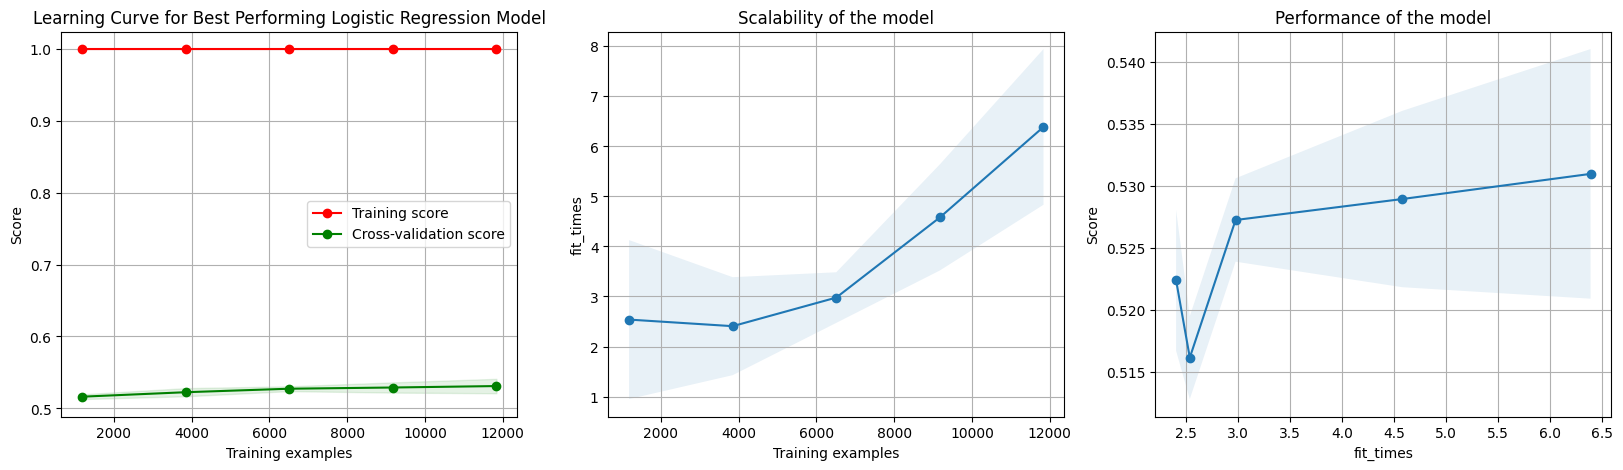

In [51]:
plot_learning_curve(best_neighbor_model, "Learning Curve for Best Performing Logistic Regression Model", X_neighbor_train, y_neighbor_train, n_jobs=5)

## Final Evaluations

In [52]:
print("Label Distributions of overall dataset")
print(y.value_counts(normalize=True))

best_tree_model_score = best_tree_model.score(X_test, y_test)
best_forest_model_score = best_forest_model.score(X_test, y_test)
best_logistic_model_score = best_logistic_model.score(X_test, y_test)
best_neighbor_model_score = best_neighbor_model.score(X_test, y_test)
multinomialNB_score = MNB_model.score(X_test, y_test)
bernoulliNB_score = BNB_model.score(X_test, y_test)
gaussianNB_score = GNB_model.score(X_test, y_test)
one_layer_score = one_layer_model.score(X_test, y_test)
multi_layer_score = multi_layer_model.score(X_test, y_test)
multi_layer_relu_score = multi_layer_relu_model.score(X_test, y_test)
ensemble_score = ensemble.score(X_test, y_test)

Label Distributions of overall dataset
1    0.524075
0    0.475925
Name: did_radiant_win, dtype: float64
74/74 [==============================] - 0s 2ms/step


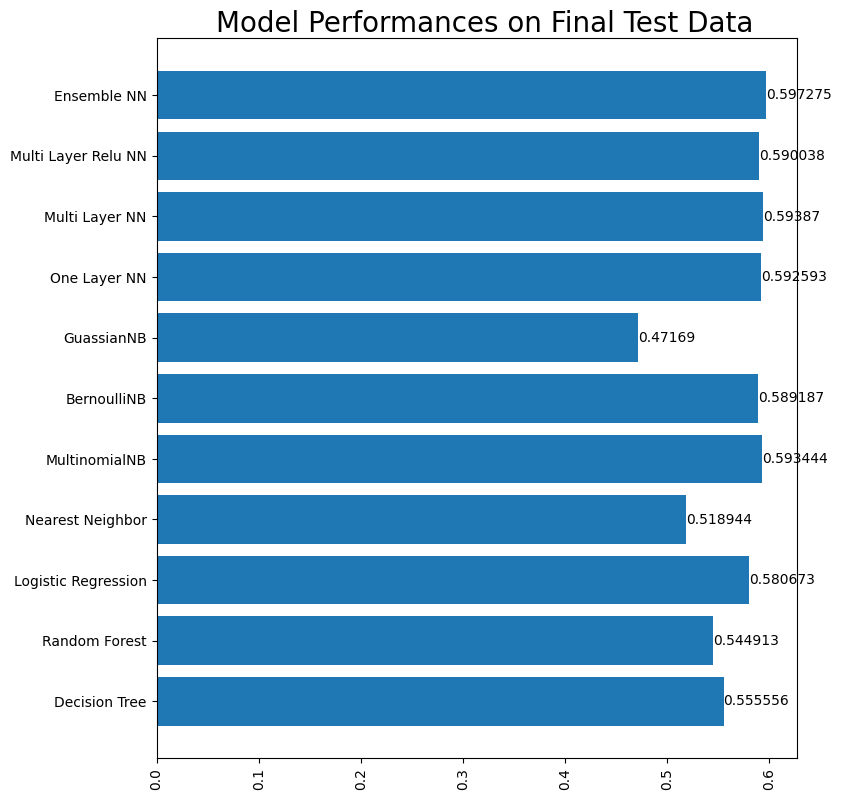

In [53]:
labels = ['Decision Tree', 'Random Forest', 'Logistic Regression', 'Nearest Neighbor', 'MultinomialNB', 'BernoulliNB', 'GuassianNB', 'One Layer NN', 'Multi Layer NN', 'Multi Layer Relu NN', 'Ensemble NN']
scores = [best_tree_model_score, best_forest_model_score, best_logistic_model_score, best_neighbor_model_score, multinomialNB_score, bernoulliNB_score, gaussianNB_score, one_layer_score, multi_layer_score, multi_layer_relu_score, ensemble_score]
fig = plt.figure()
plt.title('Model Performances on Final Test Data', fontsize=20, y=1.8)
ax = fig.add_axes([0,0,1,1.5])
# Change of fontsize and angle of xticklabels
plt.setp(ax.get_xticklabels(), fontsize=10, rotation='vertical')
bars = ax.barh(labels, scores)
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()
